In [1]:
import numpy as np
import scipy as sp
from numpy import linalg as LA
import networkx.linalg.algebraicconnectivity as alg
import collections 
import math
import pandas as pd
import networkx as nx 

In [17]:
def get_symmetric_laplacian(w):
    
    D = w.sum(axis = 1)
    zero_entries = np.where(D == 0)[0]
    D[zero_entries] = 1
    D_sqrt = np.sqrt(D)
    
    D_1 = np.reciprocal(D_sqrt)
    D_1 = np.diag(D_1)  
    D = np.diag(D)
    L = np.dot(D_1, np.dot(D - w, D_1))
    
    return L

In [2]:
def get_random_walk_laplacian(w):
    
    D = w.sum(axis = 1)
    zero_entries = np.where(D == 0)[0]
    D[zero_entries] = 1
    D_1 = np.reciprocal(D)
    D_1 = np.diag(D_1)  
    D = np.diag(D)
    L = np.dot(D - w, D_1)
    
    return L

In [3]:
def get_fielder(l, n):  #Similairty matix W

    eigvals, eigvecs = sp.linalg.eigh(l)# eigen values and eigen vectors of the unnormalized laplacian D - W 
    #print("Eigenvalues: ",eigvals, "\n")
    eigvecs = np.round( eigvecs, 5)
    eigvals = np.round(eigvals, 4)
    cardinality = 1
    
    fielder_eigval = eigvals[1]
        
    fielder = eigvecs.T[1, :] #The 2nd smallest eigen vector of the laplacian L = D - W
    
    return fielder


In [4]:
def get_matrix(graph, n):
    
    w = np.zeros((n, n))
   
    for x in graph.keys() :
        for y in graph[x]:
            w[x][y] = 1
            w[y][x] = 1

    return w
    

In [9]:
def show_graph_with_labels(adjacency_matrix):
    G = nx.from_numpy_matrix(adjacency_matrix) 
    nx.draw(G, with_labels=True)


In [12]:
graph = [{0 : [1],
         1 : [2],
         2 : [3],
         3 : [4],
         4 : [5],
         5 : [6],
         6 : [7],
         7 : [6],
             },
        8]

In [13]:
W = get_matrix(graph[0], graph[1])

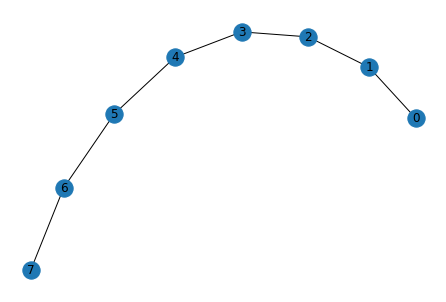

In [14]:
show_graph_with_labels(W)

In [15]:
P = get_random_walk_laplacian(W)

In [16]:
get_fielder(P, 8)

array([-0.19898, -0.17502,  0.09006,  0.33346,  0.49656,  0.54009,
        0.45357,  0.25783])

In [18]:
L = get_symmetric_laplacian(W)
get_fielder(L, 8)

array([-0.37796, -0.48159, -0.33327, -0.11894,  0.11894,  0.33327,
        0.48159,  0.37796])